In [190]:
%pylab 
from nugridpy import nugridse as mp
from nugridpy import mesa as ms
import matplotlib.pyplot as plt

# for plotting consistently with abu_profile
from nugridpy import utils as u

data_dir="/data/nugrid_apod2"    

ms.set_nugrid_path(data_dir)
mp.set_nugrid_path(data_dir)

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [191]:
# read in the mesa star log files
star = ms.star_log(mass=2.0,Z=0.02)

nugrid_path = /data/nugrid_apod2
closest set is set1.2 (Z = 0.02)
closest mass is 2.0
Using old star.logsa file ...
 reading ...100% 

Closing star.log  tool ...


In [192]:
# set path to where the diffusion data is
path_DC = '/user/ast501/dstephens/mppnp/diffusion_changes/mppnp_subtime_0/H5_out'
path_D = '/user/ast501/dstephens/mppnp/diffusion_mesa/mppnp_subtime_0/H5_out'

# read in data
star_pp_D = mp.se(path_D,rewrite=True)
star_pp_DC = mp.se(path_DC,rewrite=True)

Searching files, please wait.......
Writing preprocessor files
M2.00Z0.020.0033501.out.h5
M2.00Z0.020.0034001.out.h5
File search complete.
Closing plot_tools
Searching files, please wait.......
Writing preprocessor files
M2.00Z0.020.0033501.out.h5
Closing plot_toolsM2.00Z0.020.0034001.out.h5

File search complete.


In [232]:
# look at the lowest time step model
model = 33882

# model ranges in the thermal pulse
model_range = [33600,34200]

# species of interest at s-process synthesis sight
species = ['Neutron-1','C-13','Ne-22','Mg-25','Zr-94','Zr-95','Zr-96','Mo-95','Mo-97']

# get and print convection zone limits
star_mass = star.get('star_mass')[model_range[0]:model_range[1]]
mix_low = star.get('mx2_bot')[model_range[0]:model_range[1]] * star_mass
mix_high = star.get('mx2_top')[model_range[0]:model_range[1]] * star_mass

print mix_low[model - model_range[0] - 1], mix_high[model - model_range[0] - 1]

0.569256830366 0.594116237553


<IPython.core.display.Javascript object>


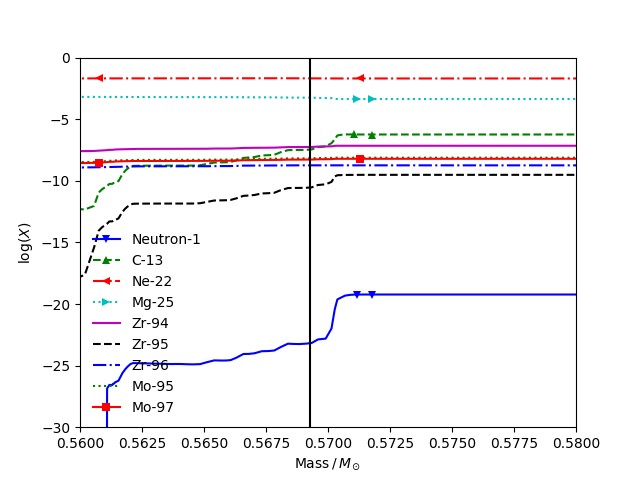

 reading ['iso_massf']...100%

(0.56, 0.58)

In [233]:
# look at the lowest time step model
model = 33882

plt.figure(1)
star_pp_DC.abu_profile(isos=species,ifig=1,fname=model,logy=True)

# plot vertical line at the lower schwarz
plt.axvline(mix_low[model - model_range[0] - 1],color='k',linestyle='-',label='Schwarz Boundary')

# limits (look at lower boundary)
plt.ylim([-30,0])
plt.xlim([0.56,0.58])

<IPython.core.display.Javascript object>


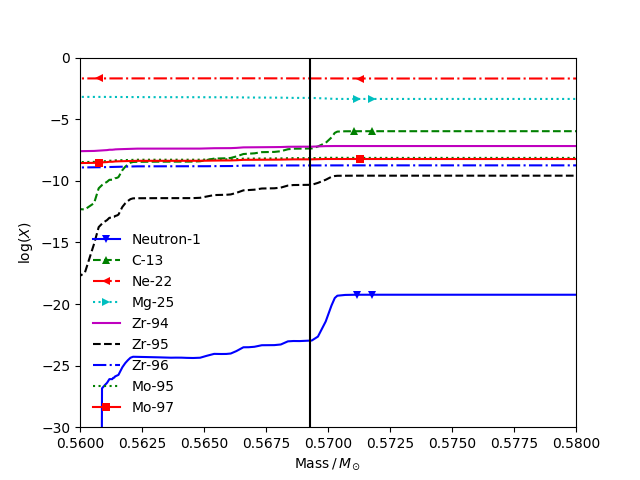

 reading ['iso_massf']...100%

(0.56, 0.58)

In [234]:
# look at original data
plt.figure(2)

star_pp_D.abu_profile(isos=species,ifig=2,fname=model,logy=True)

# plot vertical line at the lower schwarz
plt.axvline(mix_low[model - model_range[0] - 1],color='k',linestyle='-',label='Schwarz Boundary')

# look at lower boundary
plt.ylim([-30,0])
plt.xlim([0.56,0.58])

In [228]:
# make a plot of abundances but take the difference between the mass fractions
iso_massf_D = star_pp_D.get(model,'iso_massf')
iso_massf_DC = star_pp_DC.get(model,'iso_massf')
mass = star_pp_DC.get(model,'mass')

iso_ratio = np.log10(iso_massf_DC) - np.log10(iso_massf_D)

# get the isotope key
iso_keys = star_pp_D.se.isotopes

 reading ['mass']...100%.100%

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


In [235]:
# find indices corresponding to species list
iso_index = []
for i in range(len(species)):
    for p in range(len(iso_keys)):
        if species[i] == iso_keys[p]:
            iso_index.append(p)
            break

Make a plot of the ratio of species near the lower schwarzschild boundary

<IPython.core.display.Javascript object>


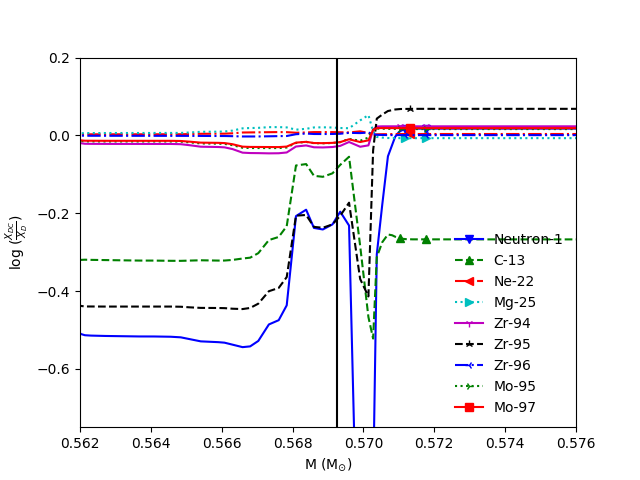

In [236]:
# make a plot of the iso ratio
plt.figure(3)
for i in range(len(iso_index)):
    plt.plot(mass,iso_ratio[:,iso_index[i]],u.linestyle(i)[0],label=iso_keys[iso_index[i]],
             markevery=u.linestyle(i)[1]*20)

# plot vertical line at the lower schwarz
plt.axvline(mix_low[model - model_range[0] - 1],color='k',linestyle='-')

# limits
plt.xlim([0.562,0.576])
plt.ylim([-0.75,0.2])

# labels
plt.xlabel(r'M (M$_{\odot}$)')
plt.ylabel(r'log ($\frac{X_{DC}}{X_{D}}$)')

# legend
plt.legend().draw_frame(False)

Make a plot of the ratio of species at the upper boundary

<IPython.core.display.Javascript object>


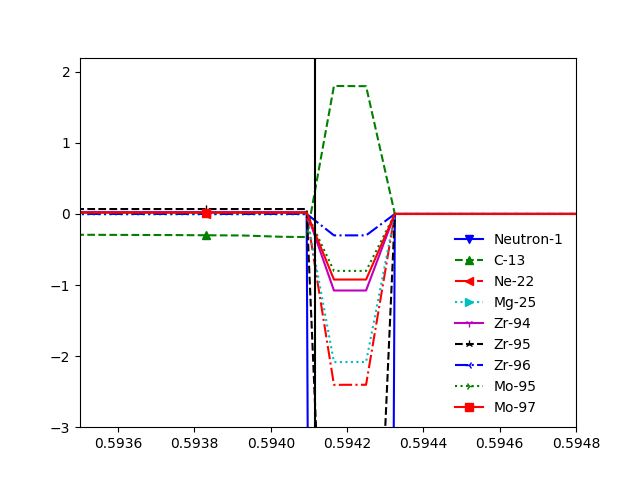

In [237]:
# make a plot of the iso ratio
plt.figure(4)
for i in range(len(iso_index)):
    plt.plot(mass,iso_ratio[:,iso_index[i]],u.linestyle(i)[0],label=iso_keys[iso_index[i]],
             markevery=u.linestyle(i)[1]*20)

# plot vertical line at the lower schwarz
plt.axvline(mix_high[model - model_range[0] - 1],color='k',linestyle='-')
# limits
plt.xlim([0.5935,0.5948])
plt.ylim([-3,2.2])

# legend
plt.legend().draw_frame(False)

In [176]:
10**-3.94e-9

0.9999999909278148